# 딥러닝 학습 기술
- Optimization(매개변수 갱신)
- Weight Decay
- Batch Normalization
- 과대적합(Overfitting) / 과소적합(Underfitting)
- 규제화(Regularization)
- Drop Out
- Hyper Parameters
    - 학습률
    - 학습 횟수
    - 미니배치 크기

In [1]:
#확률적 경사하강법(Stochastic Gradient Descent, SGD)
class SGD:
    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.learning_rate * grads[key]

SGD는 문제에 따라 시간이 매우 오래 걸림
## 모멘텀
- 경사하강을 좀 더 유지하려는 성격을 가짐
- 관성

In [2]:
class Momentum():
    def __init__(self, learning_rate=0.01, momentum=0.9):
        self.learning_rate = learning_rate
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.learning_rate * grads[key]
            params[key] += self.v[key]

In [3]:
class AdaGrad:
    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.h[key] += grads[key] ** 2
            params[key] -= self.learning_rate * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

In [4]:
import numpy as np
class RMSprop():
    def __init__(self, learning_rate=0.01, decay_rate=0.99):
        self.learning_rate = learning_rate
        self.decay_rate = decay_rate
        self. h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in prams.items():
                self.h[key] *= np.zeros_like(val)
                
        for key in params.keys():
            self.h[key] *= self.decay_rate
            self.h[key] += (1 - self.decay_rate) * grads[key] * grads[key]
            params[key] -= self.learning_rate * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

In [5]:
#가장 많이 사용되는 최적화 방법
class Adam():
    def __init__(self, learning_rate=0.001, beta1=0.9, beta2=0.999):
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
                
        self.iter += 1
        learning_rate_t = self.learning_rate * np.sqrt(1.0 - self.beta2 ** self.iter) / (1.0 - self.beta1 ** self.iter)
        
        for key in params.keys():
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key] ** 2 - self.v[key])
            
            params[key] -= learning_rate_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)

### 가중치 소실

In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

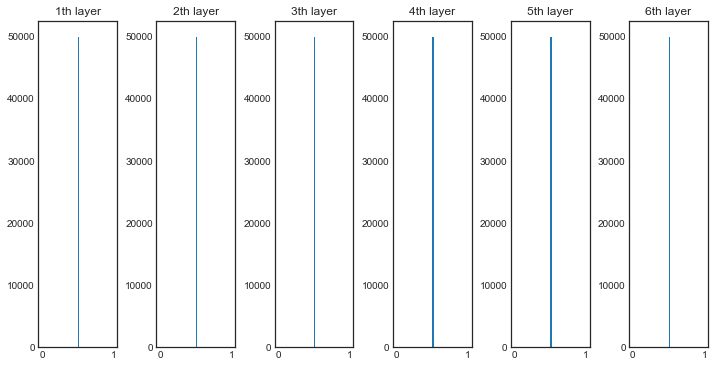

In [7]:
#가중치를 0으로 초기화 할 경우
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 50)
nodes = 50
hidden_layers  = 6
activation_values = {}

for i in range(hidden_layers):
    if i != 0:
        x = activation_values[i - 1]
        
    w = np.zeros((nodes, nodes))
    a = np.dot(x, w)
    z = sigmoid(a)
    activation_values[i] = z

plt.figure(figsize=(12, 6))
for i, a in activation_values.items():
    plt.subplot(1, len(activation_values), i + 1)
    plt.title(str(i + 1) + 'th layer')
    plt.hist(a.flatten(), 50, range=(0, 1))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    
plt.show()

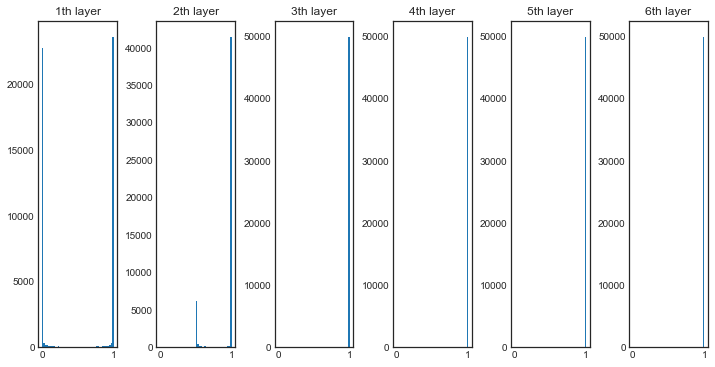

In [8]:
#가중치를 Uniform으로 초기화 할 경우
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 50)
nodes = 50
hidden_layers  = 6
activation_values = {}

for i in range(hidden_layers):
    if i != 0:
        x = activation_values[i - 1]
        
    w = np.random.uniform(1, 10, (nodes, nodes))
    a = np.dot(x, w)
    z = sigmoid(a)
    activation_values[i] = z

plt.figure(figsize=(12, 6))
for i, a in activation_values.items():
    plt.subplot(1, len(activation_values), i + 1)
    plt.title(str(i + 1) + 'th layer')
    plt.hist(a.flatten(), 50, range=(0, 1))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    
plt.show()

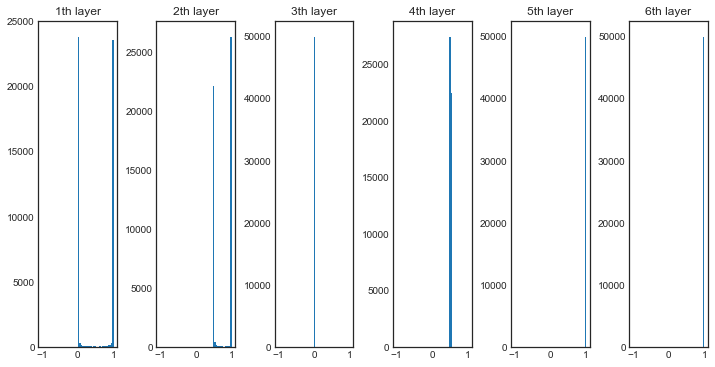

In [24]:
#가중치를 표준정규분포로 초기화 할 경우
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 50)
nodes = 50
hidden_layers  = 6
activation_values = {}

for i in range(hidden_layers):
    if i != 0:
        x = activation_values[i - 1]
        
    w = np.random.normal(nodes, nodes)
    a = np.dot(x, w)
    z = sigmoid(a)
    activation_values[i] = z

plt.figure(figsize=(12, 6))
for i, a in activation_values.items():
    plt.subplot(1, len(activation_values), i + 1)
    plt.title(str(i + 1) + 'th layer')
    plt.hist(a.flatten(), 50, range=(-1, 1))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    
plt.show()

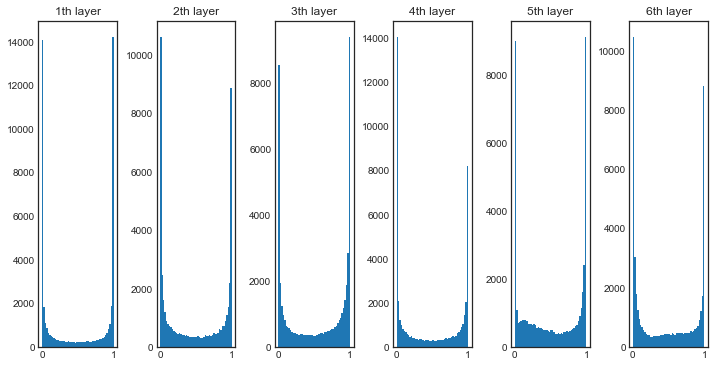

In [9]:
#가중치를 정규분포로 초기화 할 경우
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 50)
nodes = 50
hidden_layers  = 6
activation_values = {}

for i in range(hidden_layers):
    if i != 0:
        x = activation_values[i - 1]
        
    w = np.random.randn(nodes, nodes)
    a = np.dot(x, w)
    z = sigmoid(a)
    activation_values[i] = z

plt.figure(figsize=(12, 6))
for i, a in activation_values.items():
    plt.subplot(1, len(activation_values), i + 1)
    plt.title(str(i + 1) + 'th layer')
    plt.hist(a.flatten(), 50, range=(0, 1))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    
plt.show()

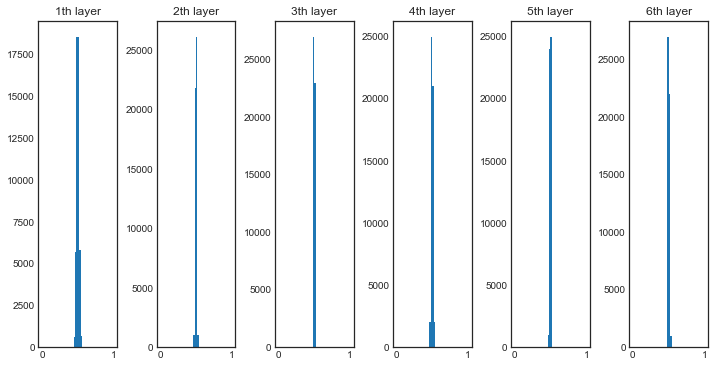

In [10]:
#가중치를 아주 작은 정규분포로 초기화 할 경우
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 50)
nodes = 50
hidden_layers  = 6
activation_values = {}

for i in range(hidden_layers):
    if i != 0:
        x = activation_values[i - 1]
        
    w = np.random.randn(nodes, nodes) * 0.01
    a = np.dot(x, w)
    z = sigmoid(a)
    activation_values[i] = z

plt.figure(figsize=(12, 6))
for i, a in activation_values.items():
    plt.subplot(1, len(activation_values), i + 1)
    plt.title(str(i + 1) + 'th layer')
    plt.hist(a.flatten(), 50, range=(0, 1))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    
plt.show()

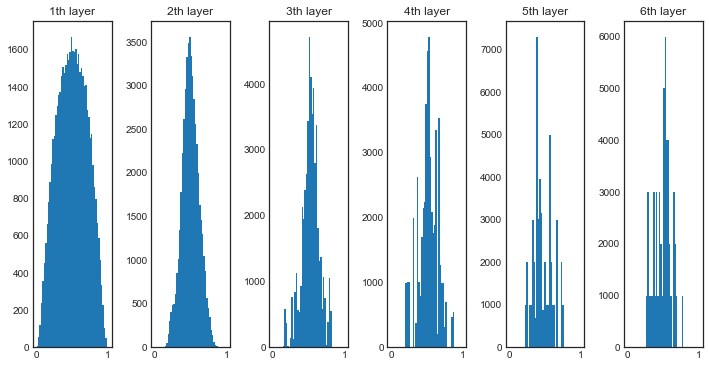

In [11]:
#가중치를 Xavier로 초기화 할 경우
# activation function이 linear일 경우 잘 작동
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 50)
nodes = 50
hidden_layers  = 6
activation_values = {}

for i in range(hidden_layers):
    if i != 0:
        x = activation_values[i - 1]
        
    w = np.random.randn(nodes, nodes) / np.sqrt(nodes)
    a = np.dot(x, w)
    z = sigmoid(a)
    activation_values[i] = z

plt.figure(figsize=(12, 6))
for i, a in activation_values.items():
    plt.subplot(1, len(activation_values), i + 1)
    plt.title(str(i + 1) + 'th layer')
    plt.hist(a.flatten(), 50, range=(0, 1))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    
plt.show()

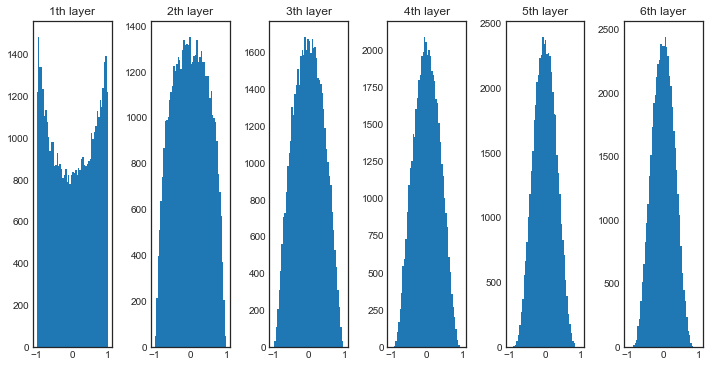

In [12]:
#activation function은 tanh, 가중치는 Xavier로 초기화
def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

x = np.random.randn(1000, 50)
nodes = 50
hidden_layers  = 6
activation_values = {}

for i in range(hidden_layers):
    if i != 0:
        x = activation_values[i - 1]
        
    w = np.random.randn(nodes, nodes) / np.sqrt(nodes)
    a = np.dot(x, w)
    z = tanh(a)
    activation_values[i] = z

plt.figure(figsize=(12, 6))
for i, a in activation_values.items():
    plt.subplot(1, len(activation_values), i + 1)
    plt.title(str(i + 1) + 'th layer')
    plt.hist(a.flatten(), 50, range=(-1, 1))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    
plt.show()

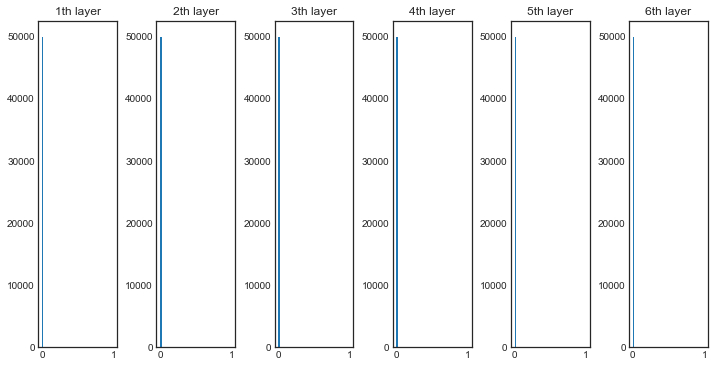

In [17]:
#비선형 함수에서의 가중치 초기화
#ReLU
# 0 초기화는 매우 좋지 않음
def ReLU(x):
    return np.maximum(0, x)

x = np.random.randn(1000, 50)
nodes = 50
hidden_layers  = 6
activation_values = {}

for i in range(hidden_layers):
    if i != 0:
        x = activation_values[i - 1]
        
    w = np.zeros((nodes, nodes))
    a = np.dot(x, w)
    z = ReLU(a)
    activation_values[i] = z

plt.figure(figsize=(12, 6))
for i, a in activation_values.items():
    plt.subplot(1, len(activation_values), i + 1)
    plt.title(str(i + 1) + 'th layer')
    plt.hist(a.flatten(), 50, range=(0, 1))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    
plt.show()

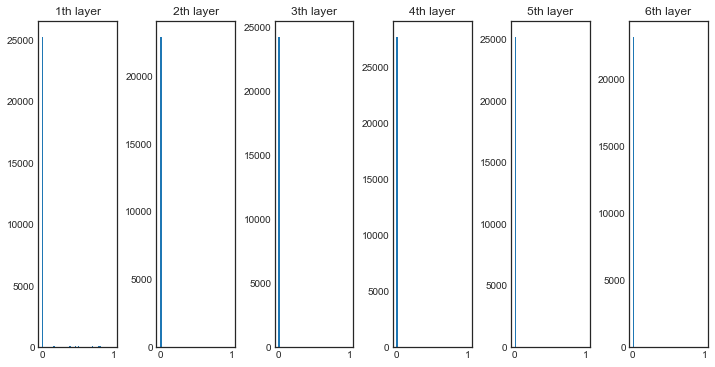

In [18]:
#ReLU
# randn도 별로...
def ReLU(x):
    return np.maximum(0, x)

x = np.random.randn(1000, 50)
nodes = 50
hidden_layers  = 6
activation_values = {}

for i in range(hidden_layers):
    if i != 0:
        x = activation_values[i - 1]
        
    w = np.random.randn(nodes, nodes)
    a = np.dot(x, w)
    z = ReLU(a)
    activation_values[i] = z

plt.figure(figsize=(12, 6))
for i, a in activation_values.items():
    plt.subplot(1, len(activation_values), i + 1)
    plt.title(str(i + 1) + 'th layer')
    plt.hist(a.flatten(), 50, range=(0, 1))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    
plt.show()

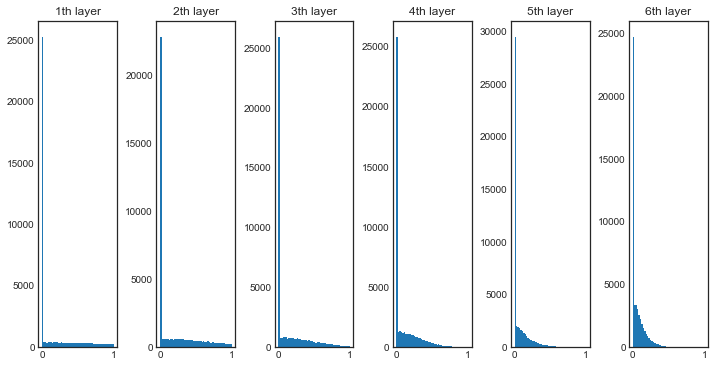

In [19]:
#ReLU
#Xavier도 별로...
def ReLU(x):
    return np.maximum(0, x)

x = np.random.randn(1000, 50)
nodes = 50
hidden_layers  = 6
activation_values = {}

for i in range(hidden_layers):
    if i != 0:
        x = activation_values[i - 1]
        
    w = np.random.randn(nodes, nodes) / np.sqrt(nodes)
    a = np.dot(x, w)
    z = ReLU(a)
    activation_values[i] = z

plt.figure(figsize=(12, 6))
for i, a in activation_values.items():
    plt.subplot(1, len(activation_values), i + 1)
    plt.title(str(i + 1) + 'th layer')
    plt.hist(a.flatten(), 50, range=(0, 1))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    
plt.show()

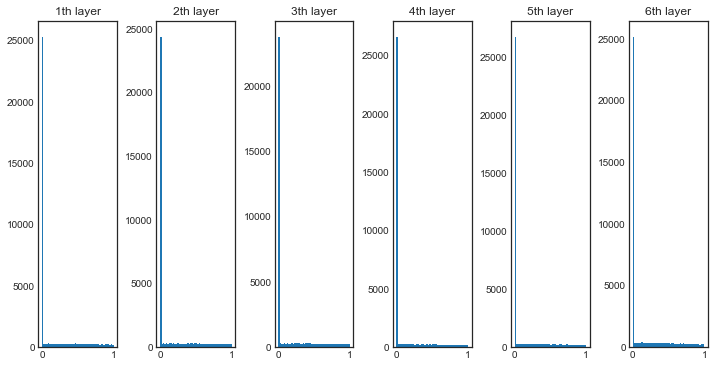

In [22]:
#ReLU
#비선형 활성화 함수에는 He가 적합
#He: 표준편차가 sqrt(2/n)인 분포
def ReLU(x):
    return np.maximum(0, x)

x = np.random.randn(1000, 50)
nodes = 50
hidden_layers  = 6
activation_values = {}

for i in range(hidden_layers):
    if i != 0:
        x = activation_values[i - 1]
        
    w = np.random.randn(nodes, nodes) * np.sqrt(2/nodes)
    a = np.dot(x, w)
    z = ReLU(a)
    activation_values[i] = z

plt.figure(figsize=(12, 6))
for i, a in activation_values.items():
    plt.subplot(1, len(activation_values), i + 1)
    plt.title(str(i + 1) + 'th layer')
    plt.hist(a.flatten(), 50, range=(0, 1))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    
plt.show()